<a href="https://colab.research.google.com/github/Jotavenom/Tool/blob/main/2_gen_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📘 Instalación de Biopython
!pip install biopython

# 📚 Importar librerías necesarias
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt

# 📧 Configurar tu correo electrónico (requerido por NCBI)
Entrez.email = "jmantilla.symbiotech@unmsm.edu.pe"  # Reemplaza con tu correo



In [ ]:
# 🔍 Paso 1: Obtener la secuencia del gen Amy23 desde NCBI
# M79328 es el ID RefSeq del ARN mensajero de Amy23
handle = Entrez.efetch(db="nucleotide", id="PQ268089", rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()

# 💾 Paso 2: Guardar la secuencia en formato FASTA
with open("Bar_sequence.fasta", "w") as output_handle:
    SeqIO.write(record, output_handle, "fasta")

# 📂 Paso 3: Leer el archivo FASTA y renombrarlo a .seq
parsed_record = SeqIO.read("Bar_sequence.fasta", "fasta")
sequence = parsed_record.seq


🧬 ID de la secuencia: PQ268089.1
📏 Longitud de la secuencia: 1833 pares de bases
🧪 Contenido GC: 41.408%


/tmp/ipython-input-1420595816.py:19: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


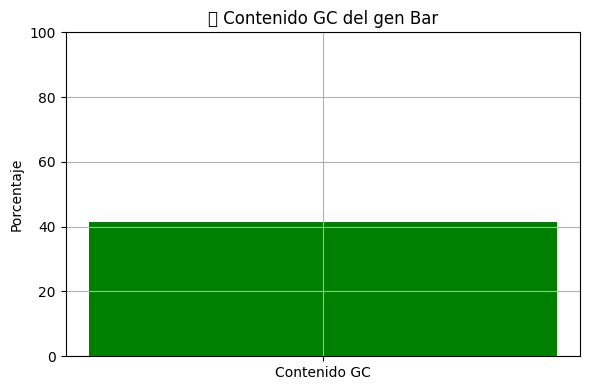

In [ ]:
# 📊 Paso 4: Calcular estadísticas básicas
sequence_length = len(sequence)
gc_content = 100 * float(sequence.count("G") + sequence.count("C")) / sequence_length
# se le pone float porque es decimal, integral sería numero entero. en este caso conviene ponerle float ya que es más preciso


# 🖨️ Paso 5: Mostrar estadísticas
print(f"🧬 ID de la secuencia: {parsed_record.id}")
print(f"📏 Longitud de la secuencia: {sequence_length} pares de bases")
print(f"🧪 Contenido GC: {gc_content:.3f}%")  # 2f son dos floats o sea decimales

# 📈 Paso 6: Graficar el contenido GC
plt.figure(figsize=(6, 4))
plt.bar(["Contenido GC"], [gc_content], color="green")
plt.ylabel("Porcentaje")
plt.title("🧬 Contenido GC del gen Bar")
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()